<a href="https://colab.research.google.com/github/geethaRam/IPython-notebooks/blob/master/COVID19_Confirmed_Cases_By_US_States.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

Data Visualizations have a big impact in data analysis, making inferences and conclusions from the data. I have been fascinated by the Bar chart race animations that were made popular in 2019 in terms of visualizing "*Most populous countries in the last century*" , "*Popular Programming language in the last 5 decades*", etc. 

The Bar chart race animation provides a unique perspective of the data grouped based on a category and how they have progressed/regressed over a period of time. 

I was curious to see the progression of COVID-19 cases that are reported across counties in different US states throughout a period of time. 

For this exercise, I have used the time-series data reported by [John Hopkins University's CSSE department](https://github.com/CSSEGISandData/COVID-19). Huge shoutout to them on the very high data quality! 

In this notebook, we will go through the data processing steps using pandas, Bar chart visualization using matplotlib, and finally, other tools that are available to build the Bar chart visualization (without much coding)

Below is a trend of Confirmed COVID cases for Maryland in the last 80 days!!

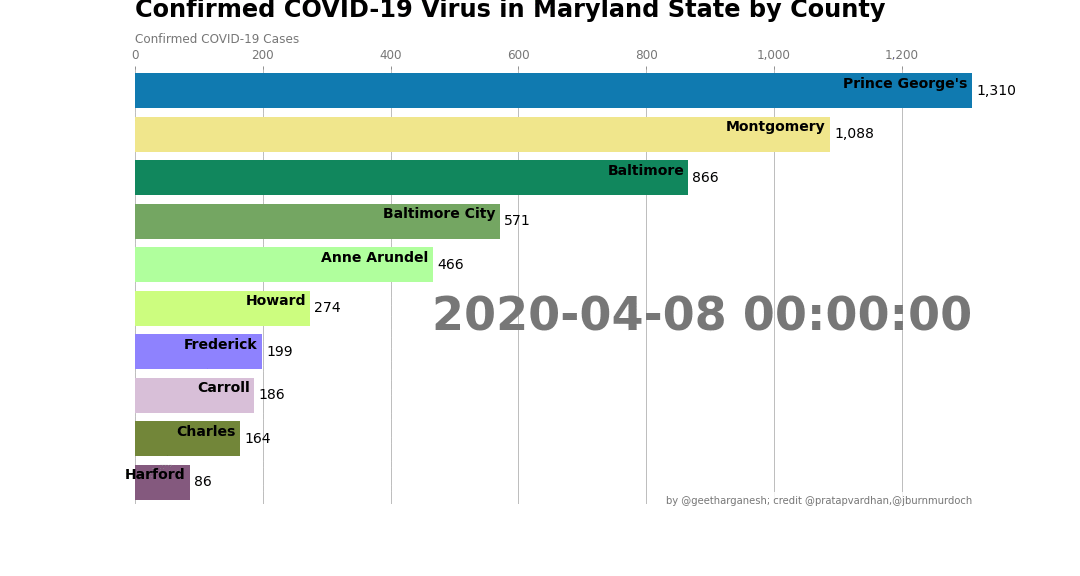

In [132]:
from IPython.display import Image
with open('/content/Maryland_confirmed_covid19.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

## Data Processing

Let us import all the required libraries first. 


1.   We will be using pandas library to wrangle the data so that it is available in a format for us to visualize
2.   We will be using matplotlib library to visualize the data and build the bar chart animation
3. We will be using *imagemagick* to convert the video from Matplotlib Animation to gif so that it is easy to share. 




In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
! apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
imagemagick is already the newest version (8:6.9.7.4+dfsg-16ubuntu6.8).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.


Next, We will use [pandas](https://pandas.pydata.org/docs/index.html) to read the COVD-19 data into dataframe. 
we will use the COVID-19 confirmed cases in US. 

In [54]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
confirmed_df.shape

(3261, 169)

Let us investigate the columns and data in the dataset. Notice the dates are represented as different columns. 

In [55]:
confirmed_df.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '6/18/20', '6/19/20', '6/20/20', '6/21/20', '6/22/20', '6/23/20',
       '6/24/20', '6/25/20', '6/26/20', '6/27/20'],
      dtype='object', length=169)

Here is a sample dataset. We can use *Province_State* for filtering by state and *Admin 2* to group by county

In [134]:
confirmed_df.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20
3256,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,"Central Utah, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,30,31,32,34,33,33,33,33,33,34,38,38,38,38,38,39,39,42,45,46,51,48,50,54,61,70,75,77,79,81,81,89,96,102,110,114,117,117,127,134
3257,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,"Southeast Utah, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,16,16,17,18,18,20,21,21,23,23,23,24,24,24,26,26,26,26,26,26,26,28,28,28,28,29,29,29,29,29,30,31,31,31,31,31,32,32,33,34
3258,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,"Southwest Utah, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,245,260,271,281,294,305,324,330,335,360,386,423,440,454,476,498,524,554,584,616,637,655,680,718,739,780,806,827,855,889,919,974,1031,1056,1104,1151,1200,1258,1302,1361
3259,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,"TriCounty, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,19,20,20,21,20,20,20,20,20,20,18,20,21,21,20,20,20,20,20,22,22,22,23,27,27,29,30,30,31,33,33,38,38,38,39,39,40,42,45,46
3260,84070020,US,USA,840,NaN,Weber-Morgan,Utah,US,41.271160,-111.914512,"Weber-Morgan, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,234,242,251,252,256,260,268,272,273,276,288,293,298,303,308,316,330,353,376,387,397,408,414,423,439,471,502,511,539,555,588,616,641,666,676,708,734,779,814,846


In order to group by date and sum the total counts for each date and county, we will need to transform the *date* columns from **wide to long** - (i.e) instead of date columns , transform to date rows. 

We will use [pandas.melt()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) method to pivot the dataset by State, county, and use the dates and confirmed counts as values columns.  

Notice in the output below, the date column has been transformed into rows compared to columns. 


In [135]:
ids = confirmed_df.columns[0:11]
dates = confirmed_df.columns[11:]
confirmed_df_nw = confirmed_df.melt(id_vars=ids, value_vars=dates, var_name='Date', value_name='Confirmed')
confirmed_df_nw.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed
515233,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,"Central Utah, Utah, US",6/27/20,134
515234,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,"Southeast Utah, Utah, US",6/27/20,34
515235,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,"Southwest Utah, Utah, US",6/27/20,1361
515236,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,"TriCounty, Utah, US",6/27/20,46
515237,84070020,US,USA,840,NaN,Weber-Morgan,Utah,US,41.271160,-111.914512,"Weber-Morgan, Utah, US",6/27/20,846


Now that we have the data in the format as required, it is easier to apply *filter* and *group-by* operations



*   First, we need to filter the data by *State*. 
    We are using *Province_State* column in the source dataset to filter based on the input state. 
*   Next, we need to group by county and date and aggregate the confirmed case counts. 
    We will use the *Admin2* column in the source dataset that indicates the *county*




In [137]:
from datetime import datetime, timedelta
us_state="Maryland"
confirmed_df_state=confirmed_df_nw[confirmed_df_nw['Province_State'] == us_state]
confirmed_df_state.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed
1198,84024001,US,USA,840,24001.0,Allegany,Maryland,US,39.623576,-78.692805,"Allegany, Maryland, US",1/22/20,0
1199,84024003,US,USA,840,24003.0,Anne Arundel,Maryland,US,39.006702,-76.603293,"Anne Arundel, Maryland, US",1/22/20,0
1200,84024005,US,USA,840,24005.0,Baltimore,Maryland,US,39.457847,-76.629120,"Baltimore, Maryland, US",1/22/20,0
1201,84024009,US,USA,840,24009.0,Calvert,Maryland,US,38.539616,-76.568206,"Calvert, Maryland, US",1/22/20,0
1202,84024011,US,USA,840,24011.0,Caroline,Maryland,US,38.871723,-75.829042,"Caroline, Maryland, US",1/22/20,0


In [118]:

confirmed_df_county = confirmed_df_state.groupby(['Date', 'Admin2'])['Confirmed'].sum().reset_index()
confirmed_df_county['Date'] = pd.to_datetime(confirmed_df_county['Date'])
confirmed_df_county = confirmed_df_county.sort_values('Date')
confirmed_df_county

,Date,Admin2,Confirmed
0,2020-01-22,Allegany,0
25,2020-01-22,Worcester,0
24,2020-01-22,Wicomico,0
23,2020-01-22,Washington,0
22,2020-01-22,Unassigned,0
...,...,...,...
3903,2020-06-27,Baltimore City,7363
3902,2020-06-27,Baltimore,7800
3900,2020-06-27,Allegany,204
3912,2020-06-27,Harford,1090


### A simple bar chart plot

<BarContainer object of 4108 artists>

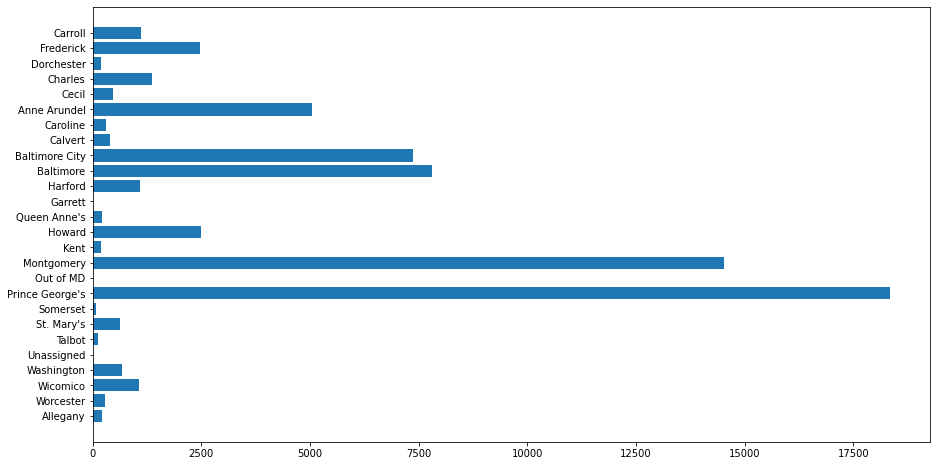

In [119]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(confirmed_df_county['Admin2'], confirmed_df_county['Confirmed'])

### Matplotlib Bar chart Race Animation



1.   We are building a color list from matplotlib.colors and shuffling it so that we get colorful graph :) 
2.   We are creating a method that will build a single barchart for a given date. The logic for this is mostly taken from https://towardsdatascience.com/bar-chart-race-in-python-with-matplotlib-8e687a5c8a41

3.   Let me walkthrough the logic for building a single barchart

*   We are getting the counties data that have the top 10 confirmed COVID-19 cases.
*   We are setting the bars to use **County for labels** and **confirmed counts for values** and setting the **colors** for bars from the randomized color list that we built.
*   Next, aligning the text on the graph for labels and values and also setting the size and width. 
*   Now that we have built the bars with the labels and values and also formatted them, now it is time to format the other captions/labels on the graph
      *   Set the *date* on the graph 
      *   Set the *captions* for the Axis
      *   More formatting
      *   Set the *title* text
      *   Set the *credits* text
4.   Given the bar-chart is built for a single-date, now we can animate this by calling the function over a list of date ranges using matplotlib.FuncAnimation
5.   Iam building the daterange from currentdate-1 and curentdate-79 days. It can be customized based on the need. 
6.   Finally, Iam using the to_jshtml() method to view the animation. One can save it as video as well
7. Last but not least, the visuals are better to be shared as gifs , so saving the animation using imagemagick to gif.  






In [120]:
import matplotlib.colors as colors
import random
colors_list = list(colors._colors_full_map.values())
random.shuffle(colors_list)

In [121]:
def draw_barchart(date):
    dff = confirmed_df_county[confirmed_df_county['Date'].eq(date)].sort_values(by='Confirmed', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['Admin2'], dff['Confirmed'], color=colors_list)
    dx = dff['Confirmed'].max() / 200
    for i, (value, name) in enumerate(zip(dff['Confirmed'], dff['Admin2'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, date, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Confirmed COVID-19 Cases', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Confirmed COVID-19 Virus in '+us_state+' State by County',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @geetharganesh; credit @pratapvardhan,@jburnmurdoch', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)

2020-04-08
2020-06-27


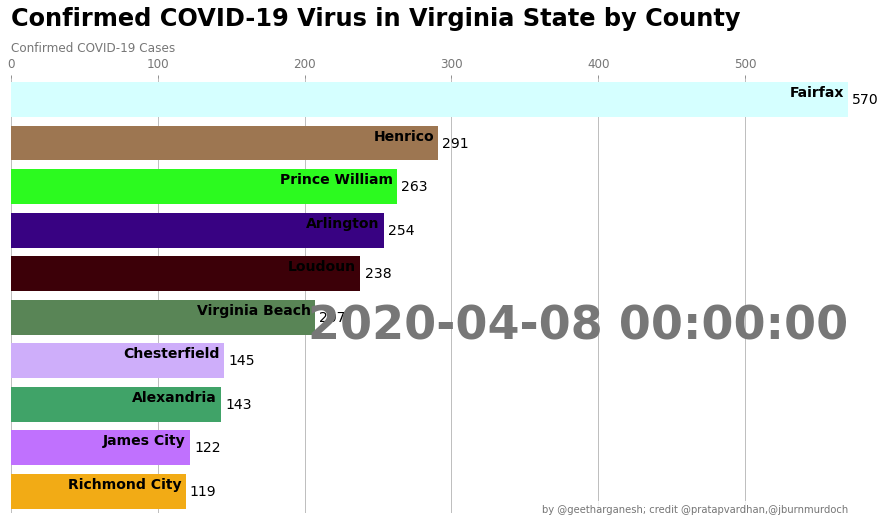

In [103]:
import matplotlib.animation as animation
from IPython.display import HTML
from datetime import datetime
from matplotlib.animation import FuncAnimation, PillowWriter

startdate = pd.to_datetime(datetime.today()) + pd.DateOffset(days=-1)
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=-80)
print (startdate.strftime('%Y-%m-%d'))
print (enddate.strftime('%Y-%m-%d'))

end=startdate.strftime('%Y-%m-%d')
begin=enddate.strftime('%Y-%m-%d')

print (begin)
print (end)
datelist=pd.date_range(start=begin,end=end)
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=datelist, interval=500, repeat=False)
HTML(animator.to_jshtml())
animator.save(us_state+"_confirmed_covid19.gif", writer='imagemagick')
#Alternatively can use Pillowwriter instead of imagemagick
#animator.save(us_state+"_confirmed_covid19.gif",writer=PillowWriter())

### Other visualization tools
If you are in a Jupyter Notebook/Python environment - visualization libraries like matplotlib, seaborn are the best!! 
Within few lines of code, you can get the visualization as needed as we saw in the above example. 

However, there are visualization tools that enables **citizen data analysts** and **business users** to build similar visualizations. 

Though these tools does not require much coding, the data analysis and data processing step will require some level of coding to bring the data in a format so that they can be leveraged in these tools. 

**Flourish Studio**

Flourish studio provides tools for visualization and storytelling. Below is an [example](https://public.flourish.studio/visualisation/3005263/) of a Bar chart race animation that I built using Flourish. Flourish provides embed tags so that they can be shared and embedded within any web application. 

Other enterprise tools like Tableau and PowerBI may also support this type of visualization! 
 

In [51]:
from IPython.core.display import display, HTML
display(HTML('<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/3005263" data-url="https://flo.uri.sh/visualisation/3005263/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>'))

#### Conclusion 

We went through the COVID-19 confirmed cases data and how to process them so that they can be visualized. Then, we looked at leveraging matplotlib to build bar chart race animations for COVID-19 cases in US by different counties for a given US state.  

Any time-series data can be used to build this visualization. This notebook retrieves data and processes them all within the notebook. We can decouple the data processing step and visualization steps. 

As an example, We can leverage AWS lambda to be triggered as scheduled event that pulls the data and processes and stages the processed data in S3. The schedule can be set depending on the source data schedule. In the case of COVID-19 data, it can be set to daily. 


I hope we are able to see a downward trend on these cases soon. Stay safe and Healthy!! 

### References

1. [Data from John Hopkins CSSE ](https://github.com/CSSEGISandData/COVID-19)
2. https://towardsdatascience.com/bar-chart-race-in-python-with-matplotlib-8e687a5c8a41
3. https://public.flourish.studio/visualisation/3005263/
4. https://matplotlib.org/3.1.1/api/animation_api.html
5. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html
6. https://github.com/ipython/ipython/issues/10045#issuecomment-318202267


